# Importing the Libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mental_health.csv')

In [3]:
df.sample(5)

,text,label
9046,hey guys im year old guy serving emotional ro...,1
8766,question oldies im question year olds people...,0
12515,help guy get medal sergeant waverly b woodson ...,0
21212,whenever come sub rteenbeauties,0
1072,life seem bit pointless anyone else rantive fe...,1


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [5]:
df.shape

(27977, 2)

# Exploratory Data Analysis.

<AxesSubplot: xlabel='label', ylabel='count'>

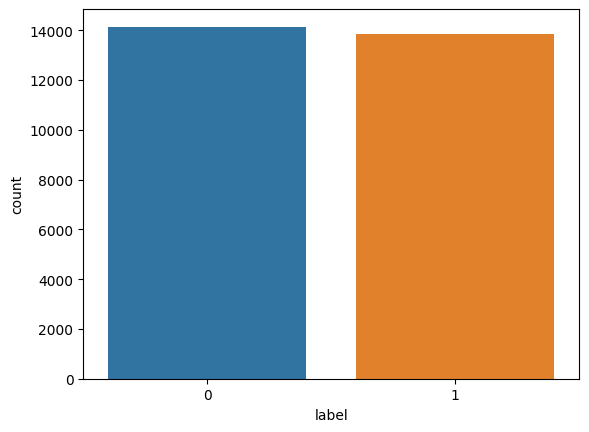

In [6]:
sns.countplot(x='label', data=df)

## 1 :- Negative Comment.
## 0 :- Positive Comment.

# Splitting into Training and Testing Set

In [7]:
X = df['text']
y = df['label']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Text Processing

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
tfidf = TfidfVectorizer(stop_words='english')

In [12]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [13]:
X_train = tfidf.transform(X_train)

In [14]:
X_test = tfidf.transform(X_test)

# Model Building and Model Selection.

In [15]:
from sklearn.naive_bayes import  MultinomialNB

In [16]:
mnb = MultinomialNB()

In [17]:
mnb.fit(X_train, y_train)

MultinomialNB()

In [18]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter = 1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
from sklearn.svm import SVC, LinearSVC

In [20]:
rb_svc = SVC()
rb_svc.fit(X_train, y_train)

SVC()

In [21]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

LinearSVC()

In [22]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In [23]:
def report_model(model):
    preds = model.predict(X_test)
    print(classification_report(y_test, preds))
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

              precision    recall  f1-score   support

           0       0.98      0.73      0.84      4203
           1       0.79      0.99      0.88      4191

    accuracy                           0.86      8394
   macro avg       0.89      0.86      0.86      8394
weighted avg       0.89      0.86      0.86      8394



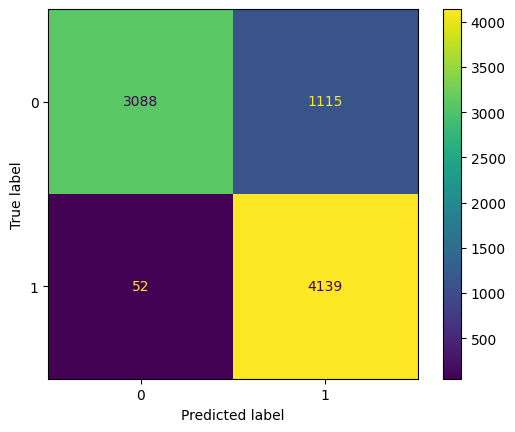

In [24]:
report_model(mnb)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      4203
           1       0.93      0.91      0.92      4191

    accuracy                           0.92      8394
   macro avg       0.92      0.92      0.92      8394
weighted avg       0.92      0.92      0.92      8394



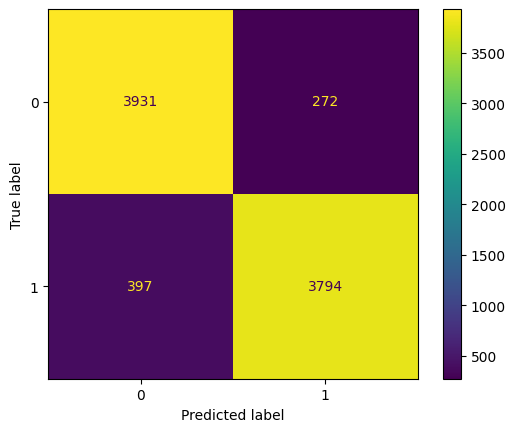

In [25]:
report_model(log_model)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      4203
           1       0.93      0.91      0.92      4191

    accuracy                           0.92      8394
   macro avg       0.92      0.92      0.92      8394
weighted avg       0.92      0.92      0.92      8394



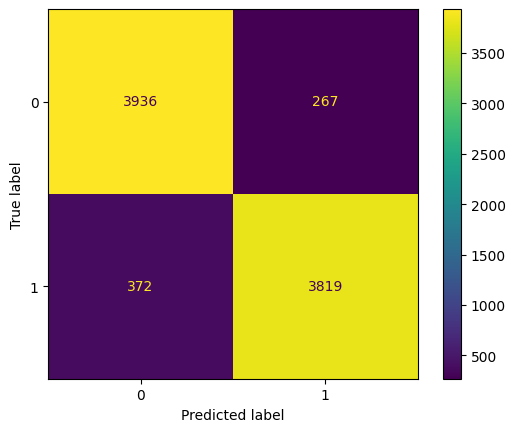

In [26]:
report_model(rb_svc)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      4203
           1       0.93      0.91      0.92      4191

    accuracy                           0.92      8394
   macro avg       0.92      0.92      0.92      8394
weighted avg       0.92      0.92      0.92      8394



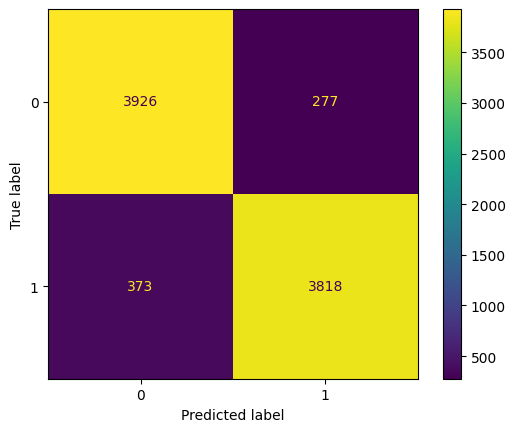

In [27]:
report_model(linear_svc)

## We found the radial basis kernel's SVM classifier is a good model.

In [28]:
df['text'][0]

'dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like  right guys learn math'

In [29]:
df['label'][0]

0

In [34]:
rb_svc.predict(tfidf.transform(['I am done for my life']))

array([1], dtype=int64)

# Now training the model on the entire dataset and making a pipeline.

In [35]:
from sklearn.pipeline import Pipeline

In [36]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svc', SVC())
])

In [37]:
pipe.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', SVC())])

In [39]:
import joblib

In [44]:
joblib.dump(pipe, 'trained_model.joblib')

['trained_model.joblib']

In [45]:
pipe.predict(['I am done for my life'])

array([1], dtype=int64)

## Trying Deep Learning Techniques.

In [43]:
X_train.shape

(19583, 58733)

In [47]:
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X, y, test_size=0.3, random_state=101)

In [48]:
X_train_dl.shape

(19583,)

In [50]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [63]:
length_array = []

In [65]:
for i in range(len(df)):
    length_array.append(len(df['text'][i]))

In [66]:
length_array

[135,
 117,
 450,
 594,
 2133,
 411,
 455,
 349,
 75,
 445,
 83,
 69,
 29,
 222,
 437,
 29,
 769,
 408,
 1197,
 84,
 314,
 74,
 1136,
 341,
 776,
 53,
 141,
 783,
 54,
 53,
 254,
 66,
 530,
 854,
 282,
 100,
 677,
 64,
 10,
 210,
 109,
 2549,
 131,
 531,
 140,
 2303,
 149,
 171,
 90,
 641,
 423,
 304,
 42,
 439,
 300,
 163,
 368,
 721,
 353,
 137,
 28,
 221,
 868,
 208,
 468,
 1916,
 69,
 69,
 72,
 115,
 98,
 71,
 211,
 146,
 618,
 107,
 157,
 72,
 136,
 63,
 881,
 803,
 3186,
 243,
 363,
 524,
 959,
 59,
 245,
 31,
 65,
 293,
 112,
 918,
 37,
 504,
 364,
 139,
 1343,
 1181,
 772,
 175,
 76,
 98,
 249,
 1064,
 2899,
 383,
 134,
 43,
 176,
 966,
 464,
 138,
 60,
 1243,
 265,
 61,
 144,
 53,
 469,
 821,
 35,
 403,
 87,
 207,
 354,
 280,
 77,
 212,
 162,
 110,
 274,
 46,
 1487,
 490,
 1281,
 250,
 472,
 2036,
 837,
 158,
 371,
 107,
 106,
 829,
 254,
 287,
 191,
 56,
 1016,
 24,
 1410,
 351,
 630,
 42,
 103,
 1032,
 123,
 132,
 672,
 104,
 471,
 27,
 276,
 107,
 2019,
 118,
 1019,
 87,
 2

In [56]:
df

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
...,...,...
27972,posting everyday people stop caring religion ...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,1
27975,whats point princess bridei really think like ...,1


In [70]:
length_array = np.array(length_array)

In [72]:
length_array.shape

(27977,)

In [73]:
length_array.mean()

464.5762590699503

In [74]:
vocab_size = 10000
embedding_dim = 16
max_length = 512
trunc_type = 'post'
oov_tok = '<oov>'

In [75]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [76]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [77]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

In [83]:
tokenizer.fit_on_texts(X_train_dl)
word_index = tokenizer.word_index

In [85]:
X_train_dl

7395     whats annoying spam messages calls need pick f...
6519     anyone elses parents ruin halloween plans lovi...
2855     im trying change life really worth iti fucking...
2754     ok but america shit china wants reality ends h...
20509    future awaits us overpopulated unforgiving was...
                               ...                        
5695     wish people didnt worry muchi wish people didn...
8006     holy shit typing password computer realized me...
17745    intense physical abuse need helpi need help im...
17931    friend ended fucking two guys houe becuase hes...
13151    well done spooky horror movie povertyrow film ...
Name: text, Length: 19583, dtype: object

In [87]:
type(X_train_dl)

pandas.core.series.Series

In [88]:
training_sequences = tokenizer.texts_to_sequences(X_train_dl)

In [89]:
train_paddded = pad_sequences(training_sequences, maxlen=max_length, truncating=trunc_type)

In [90]:
testing_sequences = tokenizer.texts_to_sequences(X_test_dl)
test_paddded = pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type)

In [96]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [97]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [98]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 512, 16)           160000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 512, 128)         41472     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 246,913
Trainable params: 246,913
Non-tr

In [99]:
num_epochs = 10

In [100]:
model.fit(train_paddded, y_train, epochs=num_epochs, validation_data=(test_paddded, y_test))

Epoch 1/10
612/612 [==============================] - 335s 534ms/step - loss: 0.3183 - accuracy: 0.8676 - val_loss: 0.2257 - val_accuracy: 0.9148
Epoch 2/10
612/612 [==============================] - 325s 531ms/step - loss: 0.2605 - accuracy: 0.9023 - val_loss: 0.3206 - val_accuracy: 0.8655
Epoch 3/10
612/612 [==============================] - 329s 538ms/step - loss: 0.1858 - accuracy: 0.9336 - val_loss: 0.2377 - val_accuracy: 0.9166
Epoch 4/10
612/612 [==============================] - 327s 534ms/step - loss: 0.1353 - accuracy: 0.9536 - val_loss: 0.2145 - val_accuracy: 0.9228
Epoch 5/10
612/612 [==============================] - 346s 566ms/step - loss: 0.1075 - accuracy: 0.9642 - val_loss: 0.2316 - val_accuracy: 0.9214
Epoch 6/10
612/612 [==============================] - 361s 590ms/step - loss: 0.0911 - accuracy: 0.9702 - val_loss: 0.2338 - val_accuracy: 0.9149
Epoch 7/10
612/612 [==============================] - 337s 550ms/step - loss: 0.0795 - accuracy: 0.9754 - val_loss: 0.3062 -

In [101]:
model.save("final_nlp_model.h5")

In [106]:
seed_text = 'I am done for my life'
token = tokenizer.texts_to_sequences([seed_text])[0]
token = pad_sequences([token], maxlen=max_length, truncating=trunc_type)

In [110]:
prediction = model.predict(token)

1/1 [==============================] - 0s 65ms/step


In [111]:
prediction

array([[0.9192641]], dtype=float32)

In [114]:
if prediction[0] <= 0.5 :
    print("Normal") 
else:
    print("Needs Medical Assistance") 

Needs Medical Assistance


## Still concluding that the SVC model is performing the best according to the accuracy

# Thus, SVC(Radial-Basis Kernel) model gives the best accuracy of 92% 